### 3-parameter exponential fitted $\beta$-scaling

Want to fit observable data as a function of $\beta$ to the form:
$$
\mathcal{O}(\beta) = \mathcal{O}_{\beta\to\infty} + C_1 e^{-C_2 \beta}
$$

where $\mathcal{O}_{\beta\to\infty}$,$C_1$, and $C_2$ are fitting parameters. The $\mathcal{O}_{\beta\to\infty}$ parameter will give a large $\beta$ extrapolation of the observable in question. Here, we will focus on the second Rényi entanglement entropy $S_2$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import optimize

Define the exponential model

In [2]:
def exponential(x, c1, c2, c3):
    return c3 + c1*np.exp(-x*c2)

In [3]:
# Array where extrapolated S2s will be saved to
extrapolated_S2s = np.zeros(15)
extrapolated_S2s_err = np.zeros(15)

Feed data points (obtained from a separate script)

In [4]:
U_list = np.array([0.500000,
                0.730000,
                1.065800,
                1.556100, 
                2.272000, 
                3.300000, 
                4.843100, 
                7.071100,   
                10.323900,
                16.666667, 
                22.007100, 
                32.130800,
                46.911700,
                68.492100,
                100.000000])

In [ ]:
# Define data points
betas = np.array([1,2,4,6,8,10,12]) # betas

In [ ]:
# Initialize arrays that will store S2 data (rows: betas, columns: U)
data = np.ones((betas.size,15))
data[0] = np.loadtxt("../ProcessedData/1D_16_16_8_Us_1.000000_1.000000_10000_S2.dat")[:,1]
data[1] = np.loadtxt("../ProcessedData/1D_16_16_8_Us_1.000000_2.000000_10001_S2.dat")[:,1]
data[2] = np.loadtxt("../ProcessedData/1D_16_16_8_Us_1.000000_4.000000_10001_S2.dat")[:,1]
data[3] = np.loadtxt("../ProcessedData/1D_16_16_8_Us_1.000000_6.000000_10001_S2.dat")[:,1]
data[4] = np.loadtxt("../ProcessedData/1D_16_16_8_Us_1.000000_8.000000_10001_S2.dat")[:,1]
data[5] = np.loadtxt("../ProcessedData/1D_16_16_8_Us_1.000000_10.000000_10001_S2.dat")[:,1]
data[6] = np.loadtxt("../ProcessedData/1D_16_16_8_Us_1.000000_12.000000_10001_S2.dat")[:,1]

errs = np.ones((betas.size,15))
errs[0] = np.loadtxt("../ProcessedData/1D_16_16_8_Us_1.000000_1.000000_10000_S2.dat")[:,2]
errs[1] = np.loadtxt("../ProcessedData/1D_16_16_8_Us_1.000000_2.000000_10001_S2.dat")[:,2]
errs[2] = np.loadtxt("../ProcessedData/1D_16_16_8_Us_1.000000_4.000000_10001_S2.dat")[:,2]
errs[3] = np.loadtxt("../ProcessedData/1D_16_16_8_Us_1.000000_6.000000_10001_S2.dat")[:,2]
errs[4] = np.loadtxt("../ProcessedData/1D_16_16_8_Us_1.000000_8.000000_10001_S2.dat")[:,2]
errs[5] = np.loadtxt("../ProcessedData/1D_16_16_8_Us_1.000000_10.000000_10001_S2.dat")[:,2]
errs[6] = np.loadtxt("../ProcessedData/1D_16_16_8_Us_1.000000_12.000000_10001_S2.dat")[:,2]

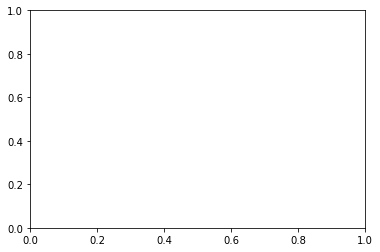

In [6]:
# Plot exact data points
fig,ax = plt.subplots(1,1)

S2 (extrapolated) 

1.352709 +/- 0.002613


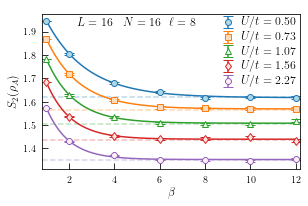

In [141]:
with plt.style.context('../IOP_large.mplstyle'):

    # Obtained with entanglement_combiner.py for betas
    U = 0.500000
    y_array_exp = data[:,0]
    sigmas = errs[:,0]

    # Perform 3-parameter exponential fit
    popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

    # Extract fit parameters
    c1,c2,c3 = popt_exponential
    c3_err = np.sqrt(np.diag(pcov_exponential)[2])

    extrapolated_S2s[0] = c3
    extrapolated_S2s_err[0] = c3_err

    # Perform the fit
    betas_fit = np.linspace(min(betas),max(betas)*1,1000)
    y_fit = exponential(betas_fit,c1,c2,c3)

    plt.plot(betas_fit,y_fit,label=None,alpha=1.0)
    plt.errorbar(betas,y_array_exp, yerr=sigmas,color='tab:blue',marker='o',label=r'$U/t=%.2f$'%0.5,fmt='.',
                capsize=5,mfc='lightblue')
    plt.axhline(1.6187,color='tab:blue',alpha=0.3,ls='--',zorder=-2)

    U = 0.730000
    y_array_exp = data[:,1]
    sigmas = errs[:,1]

    # Perform 3-parameter exponential fit
    popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

    # Extract fit parameters
    c1,c2,c3 = popt_exponential
    c3_err = np.sqrt(np.diag(pcov_exponential)[2])

    extrapolated_S2s[1] = c3
    extrapolated_S2s_err[1] = c3_err

    # Perform the fit
    betas_fit = np.linspace(min(betas),max(betas)*1,1000)
    y_fit = exponential(betas_fit,c1,c2,c3)

    plt.plot(betas_fit,y_fit,label=None,alpha=1.0)
    plt.errorbar(betas,y_array_exp, yerr=sigmas,color='tab:orange',marker='s',label=r'$U/t=%.2f$'%0.73,fmt='.',
                capsize=5,mfc='peachpuff')
    plt.axhline(1.5642,color='tab:orange',alpha=0.3,ls='--',zorder=-2)

    U = 1.0658
    y_array_exp = data[:,2]
    sigmas = errs[:,2]

    # Perform 3-parameter exponential fit
    popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

    # Extract fit parameters
    c1,c2,c3 = popt_exponential
    c3_err = np.sqrt(np.diag(pcov_exponential)[2])

    extrapolated_S2s[2] = c3
    extrapolated_S2s_err[2] = c3_err

    # Perform the fit
    betas_fit = np.linspace(min(betas),max(betas)*1,1000)
    y_fit = exponential(betas_fit,c1,c2,c3)

    plt.plot(betas_fit,y_fit,label=None,alpha=1.0)
    plt.errorbar(betas,y_array_exp, yerr=sigmas,color='tab:green',marker='^',label=r'$U/t=1.07$',fmt='.',
                capsize=5,mfc='honeydew')
    plt.axhline(1.5043,color='tab:green',alpha=0.3,ls='--',zorder=-2)

    U = 1.5561
    y_array_exp = data[:,3]
    sigmas = errs[:,3]

    # Perform 3-parameter exponential fit
    popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

    # Extract fit parameters
    c1,c2,c3 = popt_exponential
    c3_err = np.sqrt(np.diag(pcov_exponential)[2])

    extrapolated_S2s[3] = c3
    extrapolated_S2s_err[3] = c3_err

    # Perform the fit
    betas_fit = np.linspace(min(betas),max(betas)*1,1000)
    y_fit = exponential(betas_fit,c1,c2,c3)

    plt.plot(betas_fit,y_fit,label=None,alpha=1.0)
    plt.errorbar(betas,y_array_exp, yerr=sigmas,color='tab:red',marker='d',label=r'$U/t=1.56$',fmt='.',
                capsize=5,mfc='mistyrose')
    plt.axhline(1.4361,color='tab:red',alpha=0.3,ls='--',zorder=-2)

    U = 2.272
    y_array_exp = data[:,4]
    sigmas = errs[:,4]

    # Perform 3-parameter exponential fit
    popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

    # Extract fit parameters
    c1,c2,c3 = popt_exponential
    c3_err = np.sqrt(np.diag(pcov_exponential)[2])

    extrapolated_S2s[4] = c3
    extrapolated_S2s_err[4] = c3_err

    # Perform the fit
    betas_fit = np.linspace(min(betas),max(betas)*1,1000)
    y_fit = exponential(betas_fit,c1,c2,c3)

    plt.plot(betas_fit,y_fit,label=None,alpha=1.0)
    plt.errorbar(betas,y_array_exp, yerr=sigmas,color='tab:purple',marker='8',label=r'$U/t=2.27$',fmt='.',
                capsize=5,mfc='lavenderblush')
    plt.axhline(1.3524,color='tab:purple',alpha=0.3,ls='--',zorder=-2)

    # U = 3.3
    # y_array_exp = data[:,5]
    # sigmas = errs[:,5]

    # # Perform 3-parameter exponential fit
    # popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

    # # Extract fit parameters
    # c1,c2,c3 = popt_exponential
    # c3_err = np.sqrt(np.diag(pcov_exponential)[2])

    # extrapolated_S2s[5] = c3
    # extrapolated_S2s_err[5] = c3_err

    # # Perform the fit
    # betas_fit = np.linspace(min(betas),max(betas)*1,1000)
    # y_fit = exponential(betas_fit,c1,c2,c3)

    # plt.plot(betas_fit,y_fit,label=None)
    # plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label=r'$U/t=$',fmt='.',
    #             capsize=5)

    plt.legend(frameon=False,ncol=1,handlelength=0.5,handleheight=0.01,
              labelspacing=0.14,loc=(0.69,0.5))

    plt.ylabel(r'$S_2(\rho_A)$')
    plt.xlabel(r'$\beta$')
    
    plt.xlim(betas[0]-0.2,betas[-1]+0.2)
    
    plt.tick_params(direction='in',which='both')
    
    plt.annotate(r'$L=16$',(0.20+0.05,0.85+0.023),xycoords='figure fraction',fontsize=12)
    plt.annotate(r'$N=16$',(0.35+0.05,0.85+0.023),xycoords='figure fraction',fontsize=12)
    plt.annotate(r'$\ell=8$',(0.50+0.05,0.85+0.023),xycoords='figure fraction',fontsize=12)

    plt.savefig("../figures/appendix_extrapolations.pdf",dpi=300)
    plt.savefig("/Users/ecasiano/Desktop/papers-latticepigs/figures/appendix_extrapolations.pdf",dpi=300)


print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

1.569059 +/- 0.001145


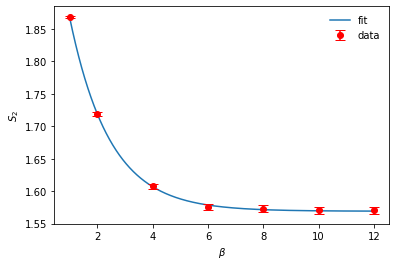

In [70]:
# Obtained with entanglement_combiner.py for betas
U = 0.730000
y_array_exp = data[:,1]
sigmas = errs[:,1]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[1] = c3
extrapolated_S2s_err[1] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

1.507993 +/- 0.002901


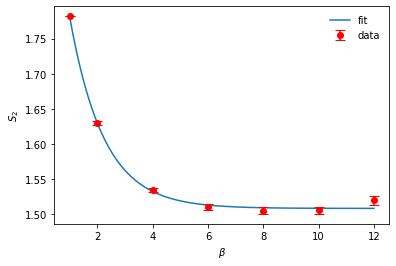

In [36]:
# Obtained with entanglement_combiner.py for betas
U = 1.0658
y_array_exp = data[:,2]
sigmas = errs[:,2]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[2] = c3
extrapolated_S2s_err[2] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

1.439590 +/- 0.002315


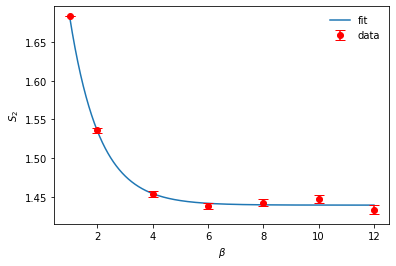

In [37]:
# Obtained with entanglement_combiner.py for betas
U = 1.5561
y_array_exp = data[:,3]
sigmas = errs[:,3]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[3] = c3
extrapolated_S2s_err[3] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

1.352709 +/- 0.002613


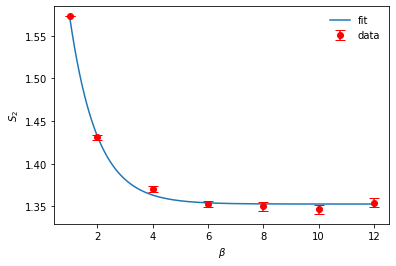

In [38]:
# Obtained with entanglement_combiner.py for betas
U = 2.272
y_array_exp = data[:,4]
sigmas = errs[:,4]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[4] = c3
extrapolated_S2s_err[4] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

1.230268 +/- 0.002408


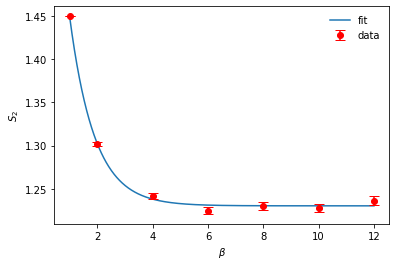

In [39]:
# Obtained with entanglement_combiner.py for betas
U = 3.3
y_array_exp = data[:,5]
sigmas = errs[:,5]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[5] = c3
extrapolated_S2s_err[5] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.876302 +/- 0.001058


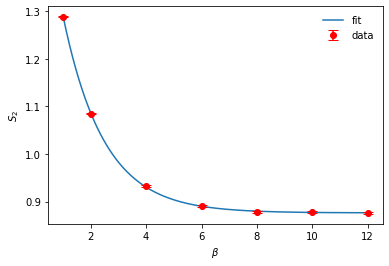

In [40]:
# Obtained with entanglement_combiner.py for betas
U = 4.843100
y_array_exp = data[:,6]
sigmas = errs[:,6]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[6] = c3
extrapolated_S2s_err[6] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.365836 +/- 0.001125


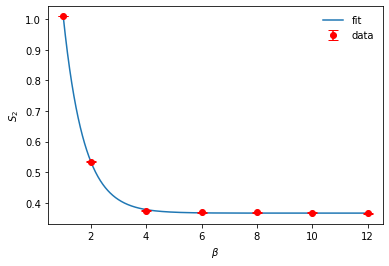

In [41]:
# Obtained with entanglement_combiner.py for betas
U = 7.0711
y_array_exp = data[:,7]
sigmas = errs[:,7]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[7] = c3
extrapolated_S2s_err[7] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.159382 +/- 0.000501


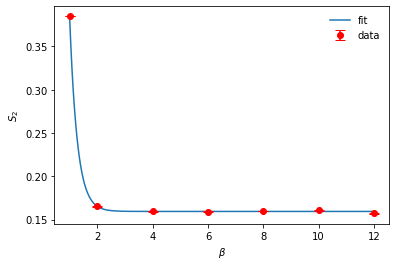

In [42]:
# Obtained with entanglement_combiner.py for betas
U = 10.3239
y_array_exp = data[:,8]
sigmas = errs[:,8]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[8] = c3
extrapolated_S2s_err[8] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.059074 +/- 0.000108


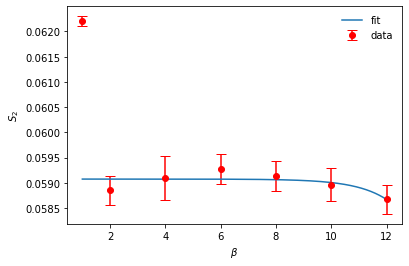

In [43]:
# Obtained with entanglement_combiner.py for betas
U = 16.666667
y_array_exp = data[:,9]
sigmas = errs[:,9]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[1:], y_array_exp[1:],sigma=sigmas[1:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[9] = c3
extrapolated_S2s_err[9] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.059074 +/- 0.000108


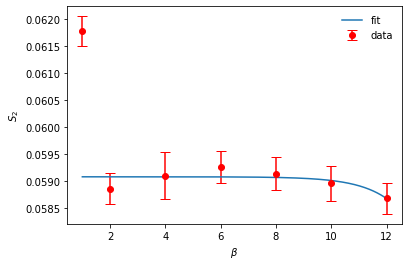

In [90]:
# Obtained with entanglement_combiner.py for betas
U = 16.666667
y_array_exp = np.array([0.06178639906938851, 0.058854691568405094, 0.059094021100469775, 0.059264784639989146, 0.05913418160869979, 0.05895803148713737, 0.05867162367835831])
sigmas = np.array([0.00027397901120447755, 0.00028714165645908146, 0.0004353116490651759, 0.0002967672299124708, 0.0003058366356456915, 0.00032625322852125333, 0.00028777416506142853])

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[1:], y_array_exp[1:],sigma=sigmas[1:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[9] = c3
extrapolated_S2s_err[9] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

In [ ]:
# Obtained with entanglement_combiner.py for betas
U = 22.0071
y_array_exp = data[:,10]
sigmas = errs[:,10]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[10] = c3
extrapolated_S2s_err[10] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.015839 +/- 0.000352


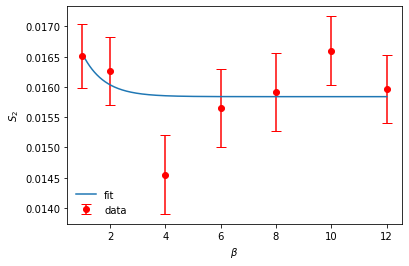

In [46]:
# Obtained with entanglement_combiner.py for betas
U = 32.1308
y_array_exp = data[:,11]
sigmas = errs[:,11]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[11] = c3
extrapolated_S2s_err[11] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.007194 +/- 0.000085


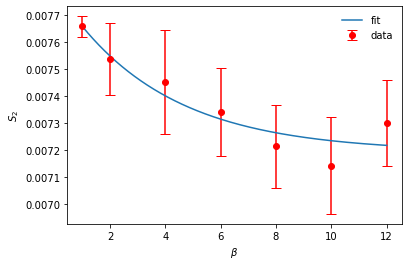

In [47]:
# Obtained with entanglement_combiner.py for betas
U = 46.9117
y_array_exp = data[:,12]
sigmas = errs[:,12]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[12] = c3
extrapolated_S2s_err[12] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.003423 +/- 0.000472


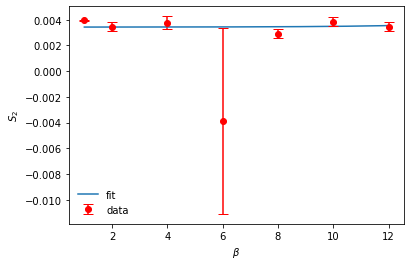

In [48]:
# Obtained with entanglement_combiner.py for betas
U = 68.4921
y_array_exp = data[:,13]
sigmas = errs[:,13]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[1:], y_array_exp[1:],sigma=sigmas[1:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[13] = c3
extrapolated_S2s_err[13] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.001731 +/- 0.000065


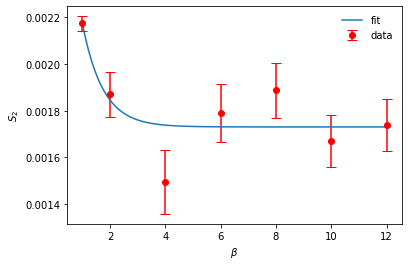

In [49]:
# Obtained with entanglement_combiner.py for betas
U = 100.0
y_array_exp = data[:,14]
sigmas = errs[:,14]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[14] = c3
extrapolated_S2s_err[14] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

Perform exponential fit to data with Scipy curve_fit

In [50]:
print(list(extrapolated_S2s))
print(list(extrapolated_S2s_err))

[1.6172285195123168, 1.5690588560309398, 1.5079926506717556, 1.4395898056973193, 1.3527089434317523, 1.2302675404389736, 0.8763022080591664, 0.3658364164104767, 0.15938249415666686, 0.0590741777614146, 0.03363889947314604, 0.015839050570354573, 0.007193987965525346, 0.00342265292653104, 0.0017305645406594477]
[0.002843980916953129, 0.0011446091884003487, 0.002900854391729173, 0.0023146691088842077, 0.002613149021169628, 0.0024079124849689607, 0.0010581822886732311, 0.0011245918842608272, 0.0005012449213740264, 0.00010847605232569004, 0.00013539512190175845, 0.0003521533484048444, 8.546139173535955e-05, 0.000472300436137347, 6.471272499299526e-05]


In [51]:
# Save the extrapolations to file here
D=1
L=16
N=16
l_max=8
t=1.000000
bin_size=10001
beta_list = np.array(betas)
#Format the data file
with open("../ProcessedData/"+str(D)+"D_%d_%d_%d_Us_%.6f_extrapolations_%d_S2.dat"%(L,N,l_max,t,bin_size),"wb") as processed_data:
    np.savetxt(processed_data,np.c_[U_list,extrapolated_S2s,extrapolated_S2s_err],delimiter=" ",fmt="%.16f",header="BH Parameters: L=%d,N=%d,D=%d,l=%d,t=%.6f,beta=extrapolations,bin_size=%d \n U               <S2>               StdErr."%(L,N,D,l_max,t,bin_size))